In [22]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

In [74]:
import quandl

I have picked the Microsoft time series for forecasting. As a pioneer in operating systems and a software giant, I am interested in understanding the company's stock performance. 

Microsoft cloud computing now has a solid market share globally. The company stock accelerated after 2016. In 2014, Microsoft hired a visionary CEO, Satya Nadella, which significantly impacted the rise in stock price. Several internal and economic factors affect the stock price. The line graph of Microsoft depicts that the share price declined sharply during the 2008 crisis till the end of 2009. 

Various factors affect the stock price;
Anticipated takeover or merger, securing large contracts, bad news about the company, company performance, big investments, etc. And some of the factors like company performance, big investments are controllable or it can be predicted with long term vision. 

The variables or factors that are impossible to obtain are the uncertain events that no one can predict, like the pandemic and war. 

In [75]:
df_msft = quandl.get("WIKI/MSFT",start_date='2008-01-01',end_date='2021-12-30')
df_msft['date']=df_intel.index
df_msft=df_msft.reset_index()
df_msft

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,date
0,2008-01-02,35.790,35.960,35.00,35.22,63004200.0,0.0,1.0,27.902659,28.035195,27.286758,27.458275,63004200.0,0
1,2008-01-03,35.220,35.650,34.86,35.37,49599600.0,0.0,1.0,27.458275,27.793512,27.177611,27.575218,49599600.0,1
2,2008-01-04,35.190,35.200,34.09,34.38,72090800.0,0.0,1.0,27.434886,27.442682,26.577302,26.803392,72090800.0,2
3,2008-01-07,34.550,34.800,34.25,34.61,80164300.0,0.0,1.0,26.935928,27.130833,26.702042,26.982705,80164300.0,3
4,2008-01-08,34.710,34.710,33.40,33.45,79148300.0,0.0,1.0,27.060667,27.060667,26.039363,26.078344,79148300.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930000,94.050000,92.210000,92.480000,23753263.0,2571
2572,2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265000,91.750000,89.660000,89.790000,37578166.0,2572
2573,2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500000,90.460000,87.080000,87.180000,42159397.0,2573
2574,2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610000,94.000000,90.400000,93.780000,55031149.0,2574


In [76]:
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Close'>

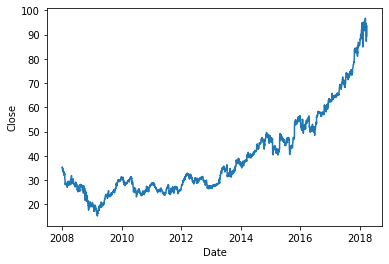

In [77]:
sns.lineplot(data=df_msft, x = 'Date', y='Close')

In [78]:
def evaluate_models (df, period, l1_ratio, shuffle_method = 'linear'):
    df_for_ml = df[['Date','Close']]
#in the for loop below i am extracting 1 day to 'period'day return of the previous day for every row.
    for i in range(1, period):
        col_name = f'{i}_day_return'
        df_for_ml = df_for_ml.copy()
        df_for_ml[col_name] = df_for_ml['Close'].shift().pct_change(periods=i)
        
    finaldf = df_for_ml.dropna()
    finaldf = finaldf.reset_index()

#in the below conditional statements i am providing two options for splitting the data.
    if shuffle_method == 'linear':
    
        train_size = round(0.8*finaldf['Close'].count())
        train_set = finaldf.iloc[:int(train_size)]
        test_set = finaldf.iloc[int(train_size):]
        X_train = train_set.drop(columns=['index', 'Date', 'Close'])
        y_train = train_set['Close']
        X_test = test_set.drop(columns=['index', 'Date', 'Close'])
        y_test = test_set['Close']
    
    if shuffle_method == 'random':
        X_features = finaldf.drop(columns=['index', 'Date', 'Close'])
        Y_feature = finaldf['Close']
        X_train, X_test, y_train, y_test = train_test_split(
        X_features, Y_feature, test_size=0.3, random_state=42)
    
#here i am using ElasticNet model from sickit learn.
    regr = ElasticNet(l1_ratio=l1_ratio)
    regr.fit(X_train, y_train)
    train_score = regr.score(X_train, y_train)
    test_score = regr.score(X_test, y_test)
    return train_score, test_score
    
    
        
        
        
    
    

In [79]:
#here i am using linear splitting method. This method overfits 
train_score, test_score = evaluate_models(df_msft, period = 600, l1_ratio = 0.1, shuffle_method = 'linear')
print (f'Training score: {train_score}; Test score: {test_score}')

Training score: 0.6389537891497572; Test score: -4.527397913285855


In [80]:
# random split provides a much better r2_score both on train and test set
train_score, test_score = evaluate_models(df_msft, period = 600, l1_ratio = 0.1, shuffle_method = 'random')
print (f'Training score: {train_score}; Test score: {test_score}')

Training score: 0.70208075457938; Test score: 0.7408152505687386


In [81]:
# When L1 and L2 ratio is equal the train score is decreasing 
train_score, test_score = evaluate_models(df_intel, period = 600, l1_ratio = 0.5, shuffle_method = 'random')
print (f'Training score: {train_score}; Test score: {test_score}')

Training score: 0.6751339679154332; Test score: 0.7016423471884842


In [82]:
# The short period decrease the score of both train and test set. So, larger the data better the prediction.
train_score, test_score = evaluate_models(df_intel, period = 150, l1_ratio = 0.1, shuffle_method = 'random')
print (f'Training score: {train_score}; Test score: {test_score}')

Training score: 0.15158605157752092; Test score: 0.12983153547249304
